# Data Manipulation

Regardless of data types, data can be represented as numerical arrays (possibly multi-dimensional array). 
For example,
* Image can be stored as a two dimensional pixel arrays.
* Text can be a one dimensional array of charcter codes.
* Time series data can be stored in a numeric array, where values denote amount and indices denote timestamps.

For Python to be a suitable language for data science, it should provide efficient storage and manipulation 
of numercial arrays. Python has a standard data type for array of data, **_list_**. However, due to its _dynamically typed_ nature, data manipulation using such a standard data type is **extremely** inefficient. For this reason, Python offers two specialized tools (i.e., modules) to store and operate on data as numerical arrays.

### Statically Typed vs Dynamically Typed
In statically typed languages such as **C/C++, Java, ** and **Scala**, a variable is defined and used for a type only, and cannot be used for different types.

```c
/* C code version */
int sum = 0;
for (int i=1; i<=100; i++) 
    sum += i;
printf("Sum of numbers between one and hundred is %d\n", sum);
```

```python
# Python code version
sum = 0
for i in range(1,101):
    sum += i
    
print("Sum of numbers between one and hundred is %d\n", sum)
```

Q: What is the main difference between the two language?

Unlike in a statically typed language, a variable can be used for any type even after it is declared and used. Consider the following:

```c
int c_var = 2;
c_var = c_var * 3.1;

/* c_var? */
```

```python
p_var = 2
p_var = p_var * 3.1

#p_var?
```

And consider this too:

```c
int c_var = two;
c_var = "dos";

/* Is this valid? */
```

```python
p_var = 2
p_var = "two"

#Is this valid?

#What about this?

p_var = 2
p_var = p_var * "hello"
```

As demonstrated, Python, a dynamically typed language, is very convenient to use. In particular, every Python type is instantiated an object and the type is resolved during runtime by the interpreter.
</p>

<img src="./images/c_vs_python.png" width="300" height="300" />

</p>

Consider the following closed box analogy.

<img src="./images/variable_box.png" width="300" height="300" />


However, remember this flexibility comes at a price. 
* Slow Speed: For every data object, its type is resolved and the proper operation is determined. 
* Increased Ambiguity: If variables are not properly used and controled, unexpected results (_side effects_) may occur.

### Efficient data manipulation at the cost of flexibility

```python
lvar = list(range(10))
lvar
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
ltype = [type(i) for i in lvar]
ltype
[<type 'int'>, <type 'int'>, <type 'int'>, <type 'int'>, <type 'int'>, <type 'int'>, <type 'int'>, <type 'int'>, <type 'int'>, <type 'int'>]
```

As we learned, a Python _list_ can contain multiple types as elements.

```python
lvar = ['Hi', 2, 3+3j, 3.14, False]
ltype = [type(i) for i in lvar]
ltype
[<type 'str'>, <type 'int'>, <type 'complex'>, <type 'float'>, <type 'bool'>]
```

Again, this flexibility is possible due to the dynamic typed nature of Python. Imagine, however, data manipulation on Python _lists_. For each operation, the type of each data element needs to be checked. But we are mostly interested in numbers as data scientists. We want to include numeric values of the same type in arrays (1D, 2D, or higher).

To address this issue, Python introduced a very efficient data manipulation module called **_numpy_**, which provides arrays of the same type along with very useful functionalities. Consider the following figure.



</p>
<img src="./images/array_vs_list.png" width="600" height="600" />
</p>

### NumPy Basic

Typically many programmers import _NumPy_ under alias **_np_**.
```python
import numpy as np
```

Most of times, you will use a NumPy object defined for an N-dimensional array type called **_ndarray_**, which denotes _N_ dimensional array. It describes the collection of items of the same type. Generally, you can create _ndarray_s using Python _list_ or using built-in _numpy_ functions.

```python
np_array1 = np.array([1,2,3,4,5,6,7,8,9])
np_array2 = np.array(list(range(10)))
np_array3 = np.array([1.2, 2.3, 3.8, 4.1], dtype=float32)
```

_numpy_ can explicitly create a multidimensional array:

```python
np_matrix = np.array([ [1,2,3], [4,5,6], [7,8,9] ])
np_matrix = np.array([range(i,i+3) for i in [1, 4, 7] ])
```


In [10]:
import numpy as np
np_matrix = np.array([range(i,i+3) for i in [1, 4, 7] ])
print np_matrix

[[1 2 3]
 [4 5 6]
 [7 8 9]]


There are a number of ways to create arrays from scratch.

* _numpy.empty_ creates uninitialized array of given type and shape (dimension)

**_numpy.empty(shape, dtype = float, order = 'C')_**

```python
import numpy as np 
x = np.empty((3,2), dtype = int) 
print x
[[-5764607523034234880 -8070441757610984749]
 [   72483105078050819    23362437629608794]
 [-5764607523034234880      853199567065492]]
```

* _numpy.zeros_ and _numpy.ones_ create an array of specified size and type, filled with zeros and ones, repectively.

**_numpy.zeros(shape, dtype = float, order = 'C')_**

```python
import numpy as np
x = np.zeros((3,2), dtype = int) 
print x
[[0 0]
 [0 0]
 [0 0]]

y = np.ones((3,2), dtype = int) 
print y
[[1 1]
 [1 1]
 [1 1]]
```

* _numpy.full_ creates an array of specified size and type, filled with the given constant value.
```python
import numpy as np
x = np.full((3,5), 3.14)
print x
[[ 3.14  3.14]
 [ 3.14  3.14]
 [ 3.14  3.14]]
```

* _numpy.arange_ and _numpy.linespace_ are useful to generate an array of values from given interval.

```python
import numpy as np
x = np.arange(0,20,2)
print x
[ 0  2  4  6  8 10 12 14 16 18]

y = np.linspace(0,1,5)
print y
[ 0.    0.25  0.5   0.75  1.  ]
```
 
* _numpy_ offers a number of functions with which you can generate an array of random values.

```python
import numpy as np
x = np.random.random((3,3))

y = np.random.normal(0,1,(3,3))

z = np.random.randint(0,10,(3,3))
```

### NumPy Array Attributes
NumPy arrays include a number of attributes. Among those, let us consider the following.

* _ndim_
* _shape_
* _size_
* _dtype_


```python
import numpy as np
x = np.full((3,5), 3.14)
print x
[[ 3.14  3.14]
 [ 3.14  3.14]
 [ 3.14  3.14]]
 
print("ndim: ", x.ndim)
('ndim: ', 2)

print("shape: ", x.shape)
('shape: ', (3, 5))

print("size: ", x.size)
('size: ', 15)

print("type: ", x.dtype)
('type: ', dtype('float64'))
```

### Acessing NumPy Array Elements
You can access _ndarray_ elements in two ways:
* Indexing: accessing single element
* Slicing: accessing sub-arrays

#### Indexing is very much like indexing of Python _list_.


In [19]:
x = np.arange(0,10)
print x

#print x[0]
#print x[3]
#print x[-1]
#print x[-2]


[0 1 2 3 4 5 6 7 8 9]


Accessing an element in a multi-dimensional array, use comma-separated tuple.

In [23]:
x = np.array([range(i,i+3) for i in [0,3,6]])
print x

#print x[0,0]
#print x[1,2]
#print x[2,2]

[[0 1 2]
 [3 4 5]
 [6 7 8]]


Accessing subarrays is done by designating **_slice_** using **(:)**.

**_x[start:end:stepsize]_**


In [25]:
x=np.arange(0,10)
print x

#print x[0:10:1]
#print x[0:3]
#print x[:5:2]
#print x[::2]
#print x[1::2]
#print x[::-1]
#print x[5::-2]


[0 1 2 3 4 5 6 7 8 9]


For a multidimensional array, use this colon notation for each dimension separated by comma.
Important thing to remember is single colon (:) denotes **everything**.

#https://en.wikipedia.org/wiki/Heights_of_presidents_and_presidential_candidates_of_the_United_States

In [35]:
x = np.array([range(i,i+5) for i in [0, 5, 10, 15]])

print x
print ""
#print x[:,0]   
#print x[0,:] 
#print x[1:5:2,:]
#print x[::-1, ::-1]
#print x[:3,::2]


[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]

[ 0  5 10 15]
[0 1 2 3 4]
[[ 5  6  7  8  9]
 [15 16 17 18 19]]
[[19 18 17 16 15]
 [14 13 12 11 10]
 [ 9  8  7  6  5]
 [ 4  3  2  1  0]]
[[ 0  2  4]
 [ 5  7  9]
 [10 12 14]]


### UFunc and Vectorized Computation

Again, Python is inherently sluggish language due to dynamic type checking. Consider the following code borrowed from 
**_Python Data Science Handbook_** by Jake vanderPlas.

In [97]:
np.random.seed(0)

def compute_reciprocals(values):
    output = np.empty(values.size)
    for i in range(values.size):
        output[i] = 1.0 / values[i]
    return output

#values = np.random.randint(1,10,size=5)
#compute_reciprocals(values)

big_array = np.random.randint(1,100,1000000)
#timeit compute_reciprocals(big_array)
%timeit y = 1.0 / big_array 

100 loops, best of 3: 5.3 ms per loop


NumPy provides a mechanism that treats all array elements equally (kind of statically typed). This is also known as **_vectorized_** operation. NumPy offers a number of vectorized functions called **_UFunc_**. Also basic Python operators are also overloaded to be UFunc compliant.

In [49]:
x = np.arange(10)
print("x =",x)
print("x + 1=", x+1)
print("x - 1=", x-1)
print("x * -1=", x*-1)
print("x * 3=", x*3)
print("x / 3=", x/3)
print("x ** 2=", x**2)
print("x % 2=", x%2)

print("x + x=",np.add(x,x))
print("x - 1=", np.subtract(x,1))
print("x * -1=", np.negative(x))
print("x * 3=", np.multiply(x,3))
print("x / 3=", np.divide(x,3))
print("x ** 2=", np.power(x,2))
print("x % 2=", np.mod(x,2))

('x =', array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))
('x + 1=', array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))
('x - 1=', array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8]))
('x * -1=', array([ 0, -1, -2, -3, -4, -5, -6, -7, -8, -9]))
('x * 3=', array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27]))
('x / 3=', array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3]))
('x ** 2=', array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81]))
('x % 2=', array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1]))
[]

('x + x=', array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18]))
('x - 1=', array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8]))
('x * -1=', array([ 0, -1, -2, -3, -4, -5, -6, -7, -8, -9]))
('x * 3=', array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27]))
('x / 3=', array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3]))
('x ** 2=', array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81]))
('x % 2=', array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1]))


#### Other Math UFuncs

* np.abs(x) or np.absolute(x)
* np.sin(x)/np.arcsin(x), np.cos(x)/np.arccos(x), np.tan(x)/np.arctan(x)
* np.exp(x), np.log(x), np.log2(x), np.log10(x)
* And more ... (look for special functions of your need. There are many!!!)



In [22]:
x = np.random.normal(0,2,(3,2))
y = np.random.normal(0,2,(3,2))


print
print(np.sin(x))
print
print(np.log(np.abs(x+1)))





[[ 0.62523077 -0.80882751]
 [-0.39325258 -0.7331158 ]
 [ 0.99934665  0.92098926]]

[[ 0.51606817  0.18185241]
 [-0.51779407  0.27664684]
 [ 0.95817964  0.77500923]]


#### Aggregation

To compute summary statistics of a large numeric array is probably a first step for many data scientists. Numpy provides useful aggregate UFuncs for this purpose.

* np.mean(), np.median()
* np.prod()
* np.std(), np.var()
* np.min(), np.argmin()
* np.max(), np.argmax()
* np.quantile()

Our example, *foreast cover type*  includes observations of 30m x 30m patches in four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. The seven forest cover types are:

1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

[Data can be downloaded frome here (Kaggle site)](https://www.kaggle.com/c/forest-cover-type-prediction/data)

Index([u'Id', u'Elevation', u'Aspect', u'Slope',
       u'Horizontal_Distance_To_Hydrology', u'Vertical_Distance_To_Hydrology',
       u'Horizontal_Distance_To_Roadways', u'Hillshade_9am', u'Hillshade_Noon',
       u'Hillshade_3pm', u'Horizontal_Distance_To_Fire_Points',
       u'Wilderness_Area1', u'Wilderness_Area2', u'Wilderness_Area3',
       u'Wilderness_Area4', u'Soil_Type1', u'Soil_Type2', u'Soil_Type3',
       u'Soil_Type4', u'Soil_Type5', u'Soil_Type6', u'Soil_Type7',
       u'Soil_Type8', u'Soil_Type9', u'Soil_Type10', u'Soil_Type11',
       u'Soil_Type12', u'Soil_Type13', u'Soil_Type14', u'Soil_Type15',
       u'Soil_Type16', u'Soil_Type17', u'Soil_Type18', u'Soil_Type19',
       u'Soil_Type20', u'Soil_Type21', u'Soil_Type22', u'Soil_Type23',
       u'Soil_Type24', u'Soil_Type25', u'Soil_Type26', u'Soil_Type27',
       u'Soil_Type28', u'Soil_Type29', u'Soil_Type30', u'Soil_Type31',
       u'Soil_Type32', u'Soil_Type33', u'Soil_Type34', u'Soil_Type35',
       u'Soil_Type36', 

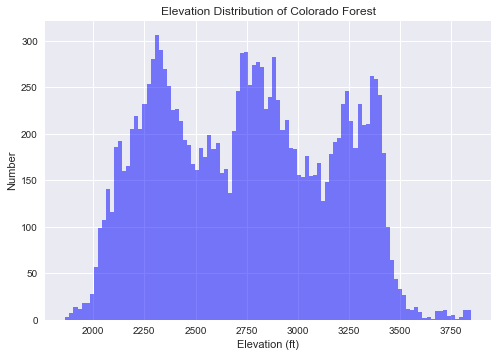

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

data = pd.read_csv('data/forest.csv')
print data.columns
print
elevation = np.array(data['Elevation'])
print elevation.size
print elevation.max(), elevation.min()
print np.median(elevation)
print np.percentile(elevation,25)

plt.hist(elevation, 100, color='blue',alpha=0.5)
plt.title('Elevation Distribution of Colorado Forest')
plt.xlabel('Elevation (ft)')
plt.ylabel('Number')


### Broadcasting: Odd Concept But Extremely Useful in Practice

Suppose you have two arrays of differnt sizes. What if you want to use the smaller array multiple times to perform some arithmetic operations on the larger array? **NumPy** offers a mechanism for this purpose: **_broadcasting_**.

More formally, **_broadcasting_** is a way to apply binary UFuncs (addition, subtraction, multiplication, etc.) on arrays of different sizes.

In [66]:
import numpy as np
x = np.array([range(i,i+3) for i in [0,3,6]])
print("x=",x)
print
print("1 + x =", x + 1)

# Or we can do
#print ( x + np.ones((3,3), dtype=int))

('x=', array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]]))

('1 + x =', array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]]))


In [67]:
import numpy as np
x = np.array([range(i,i+3) for i in [0,3,6]])
y = np.array([1, 2, 1])

print(x)
print
print(y)
print
print("x - y", x-y)

[[0 1 2]
 [3 4 5]
 [6 7 8]]

[1 2 1]

('x - y', array([[-1, -1,  1],
       [ 2,  2,  4],
       [ 5,  5,  7]]))


In [78]:
import numpy as np
x = np.arange(3)

print('x+x=',x+x)

#Now let's compute x+x'
#print('x+x\'=',x+x[:,np.newaxis])


('x+x=', array([0, 2, 4]))


#### Broadcasting Rules
When two NumPy arrays are passed to a UFunc:

1. If the arrays do not have the same rank, pad the shape of the lower rank array with _ones_ until both shapes have the same length.
2. If the shape of the two arrays are different, the array with shape _ones_ is stretched.
3. If in any dimension the sizes are different and neighter is _one_, an error occurs.

</p>
<img src="./images/numpy_broadcasting.png" width="600" height="600" />
</p>

In [94]:
import numpy as np

#example 1
#M = np.ones((2,3))
#a = np.arange(3)
#print M + a

#example 2
#a = np.arange(3).reshape((3,1))  # same as a = np.arange(3)[:, np.newaxis]
#b = np.arange(3)
#print a + b

#example 3
M = np.ones((3,2))
a = np.arange(3)

print M + a[:, np.newaxis]

[[ 1.  1.]
 [ 2.  2.]
 [ 3.  3.]]


#### Examples
* data centering
* distance map

</p>
<img src="./images/route66.png" width="600" height="600" />
</p>
Let’s construct a table of distances (in miles) between cities on the Route 66 from Chicago to LA. 
1. Chicago, 0
2. Springfield, 198
3. Saint-Louis, 303
4. Tulsa, 736
5. Oklahoma City, 871
6. Amarillo, 1175
7. Santa Fe, 1475
8. Albuquerque, 1544
9. Flagstaff, 1913
10. Los Angeles, 2448

In [99]:
import numpy as np
miles = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
print np.abs((miles - miles[:, np.newaxis]))


[[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]]
